In [ ]:
#task 1

Logistic Regression (Binary Classification)
Task: Predict if a Bank Customer Will Churn
Features:
•	Age
•	Account Balance
•	Number of Products
•	Credit Score
•	Tenure (years with bank)

In [5]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\RF\Desktop\Bank Customer Churn Prediction.csv')


df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\RF\Desktop\Bank Customer Churn Prediction.csv')

# Data Preprocessing
df = df.drop(['customer_id','credit_score','age','tenure','balance','products_number','estimated_salary'], axis=1)
df = pd.get_dummies(df, columns=['gender', 'country'], drop_first=True)
X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Model Evaluation
y_pred = logreg.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1607    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#task 2
Logistic Regression (Multiclass Classification)
Task: Predict Type of Handwritten Digit (0–9)
Dataset:
•	MNIST Digits dataset (built into sklearn.datasets.load_digits())

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9648148148148148
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      0.92      0.94        50
           2       0.94      1.00      0.97        47
           3       0.98      0.94      0.96        54
           4       1.00      0.98      0.99        60
           5       0.96      0.97      0.96        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.85      0.95      0.90        43
           9       0.96      0.92      0.94        59

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.97      0.96      0.97       540



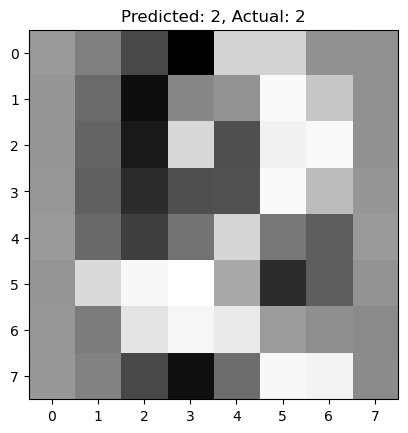

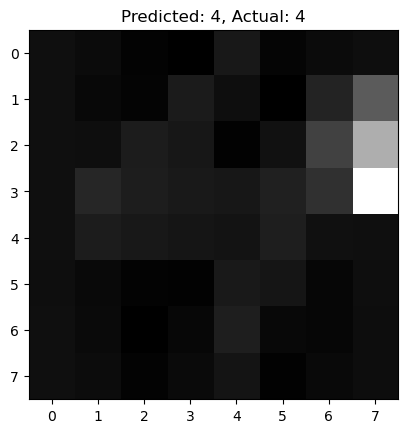

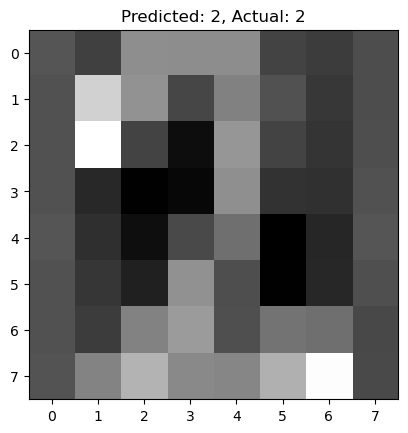

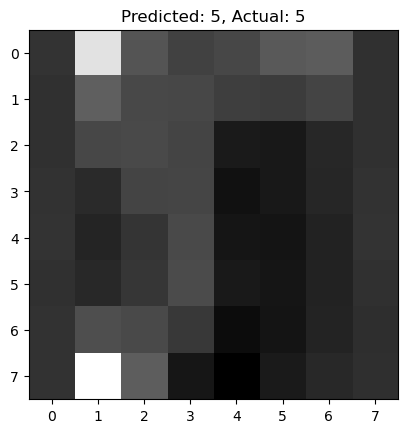

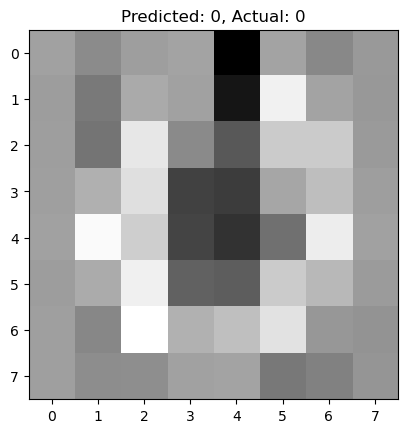

In [15]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST digits dataset
digits = load_digits()

# Prepare the data
X = digits.data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a multiclass logistic regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear')  # One-vs-Rest strategy
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Display some predictions
num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)

for i in indices:
    # Reshape the flattened image to its original shape
    image = X_test[i].reshape(8, 8)
    
    # Get the predicted and actual labels
    predicted_label = y_pred[i]
    actual_label = y_test[i]
    
    # Display the image
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label}, Actual: {actual_label}")
    plt.show()
